# Import Packages

In [1]:
import warnings 
warnings.simplefilter(action='ignore')
import pandas as pd
import os
import sys
parent_path = os.path.join(os.getcwd(), '..')
if parent_path not in sys.path:
    sys.path.append(parent_path)
import pickle
from pypinyin import pinyin, Style

import numpy as np
from utility.data import data_imputer, data_slicing, \
    transformer_slice, get_dict_from_pd, train_test_split
from utility.visuals import plot_time_series, yield_visuals
from model.gpt import GPT_fit, GPT_predict, get_desired_sequence
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, \
AdaBoostRegressor


# Retrieve Data

In [2]:

with open('../Data/source_data.pkl', 'rb') as f:
    df = pickle.load(f)
df_list, date_range = data_imputer(df)
date_num = date_range.values
sequences = get_dict_from_pd(df_list, 'address1', '受傷')

# Data splitting / slicing

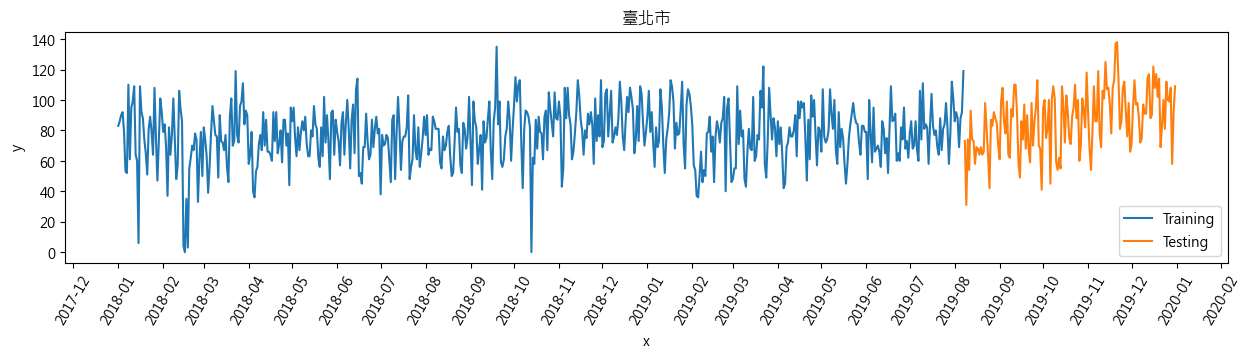

{}

In [15]:

curr_address = '臺北市'
length = sequences[curr_address].shape[0]
train, test = train_test_split(sequences[curr_address], length)
train_x, train_y, final_segment = data_slicing(train, 150)
train_x_g, train_y_g, final_segment = transformer_slice(train, 150)
plot_time_series(train, test, xticks=date_num, title=curr_address, pred=np.array([]))



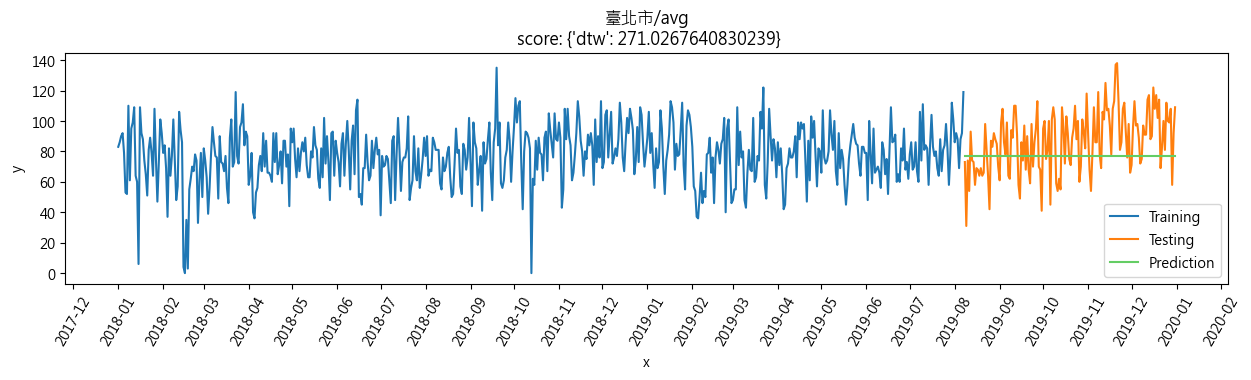

100%|██████████| 145/145 [00:00<00:00, 1150.76it/s]


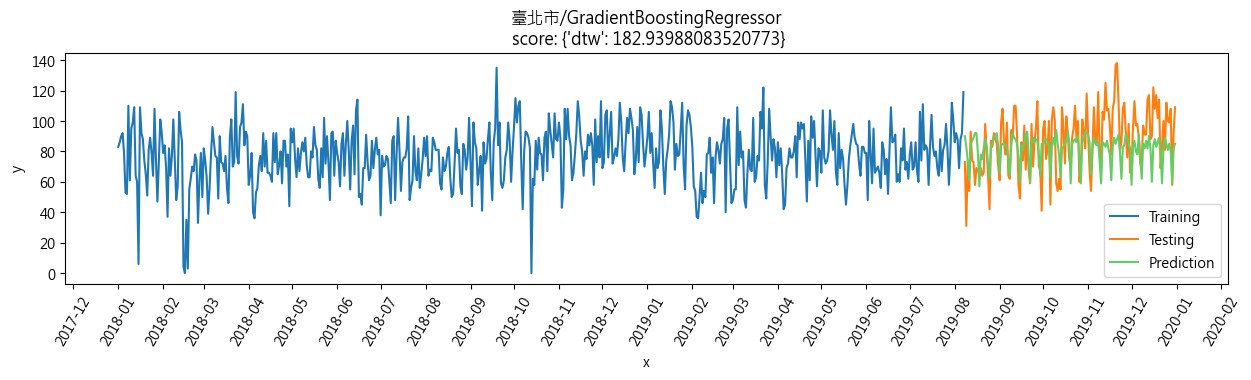

100%|██████████| 145/145 [00:03<00:00, 41.65it/s]


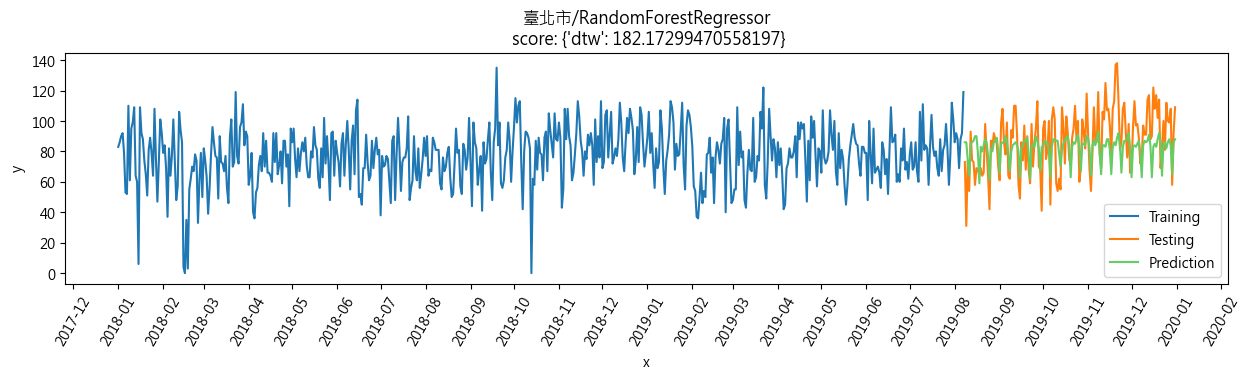

100%|██████████| 145/145 [00:02<00:00, 56.45it/s]


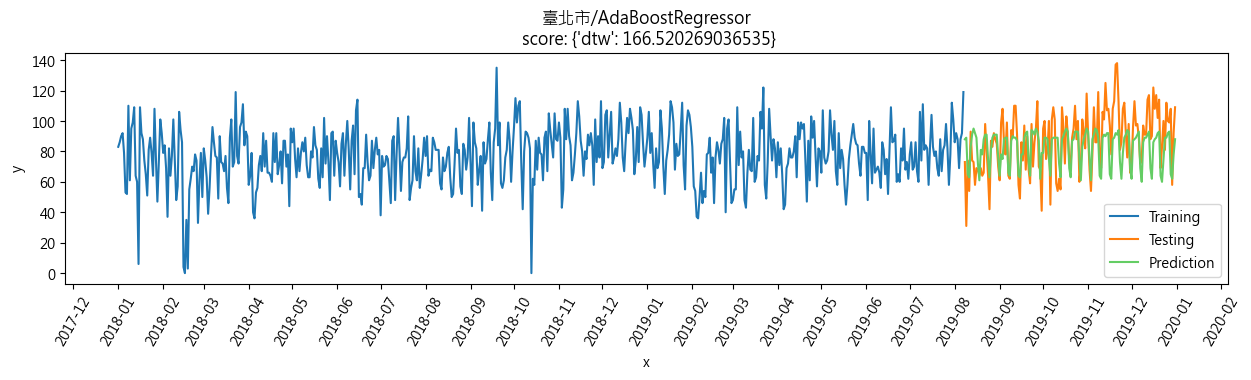

In [14]:
plot_time_series(train, test, xticks=date_num, title=curr_address \
                 + "/avg\n", pred=np.mean(train) * np.ones_like(test))  
  
g_map = yield_visuals(GradientBoostingRegressor, final_segment, {},\
              train_x, train_y, train, test, date_num, curr_address)
r_map = yield_visuals(RandomForestRegressor, final_segment, {},\
              train_x, train_y, train, test, date_num, curr_address)
a_map = yield_visuals(AdaBoostRegressor, final_segment, {},\
              train_x, train_y, train, test, date_num, curr_address)
